In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
titanic_df = pd.read_csv("C:/Users/Trishit/Documents/Prodigy Infotech/Data Science/Task 2/titanic.csv")

DATASET DESCRIPTION:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [11]:
# Display the dataset
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# Structure of the dataset
titanic_df.shape

(891, 12)

In [13]:
# Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Now we have to handle the null values.

In [14]:
# Fill missing values in 'Age' column with median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' column with the mode
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(mode_embarked, inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
titanic_df.drop(columns=['Cabin'], inplace=True)


In [15]:
# Check if missing values have been handled
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Now that missing values have been handled, we can proceed with exploratory data analysis (EDA) to gain insights into the dataset. Let's start by visualizing the distribution of some key variables and exploring relationships between variables.

In [23]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


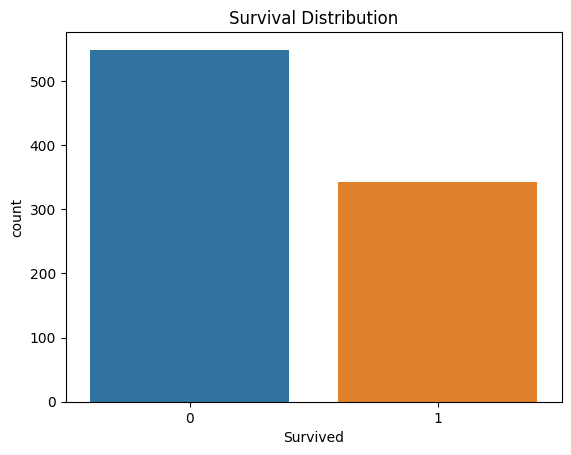

In [16]:
# Visualize the distribution of survival
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.show()

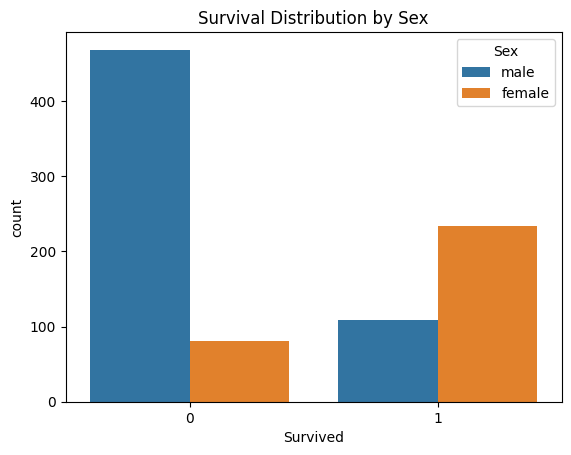

In [17]:
# Visualize the survival distribution by sex
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Distribution by Sex')
plt.show()

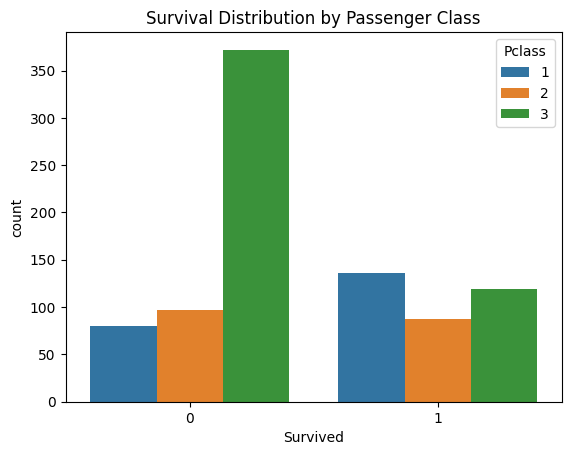

In [18]:
# Visualize the survival distribution by passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Distribution by Passenger Class')
plt.show()

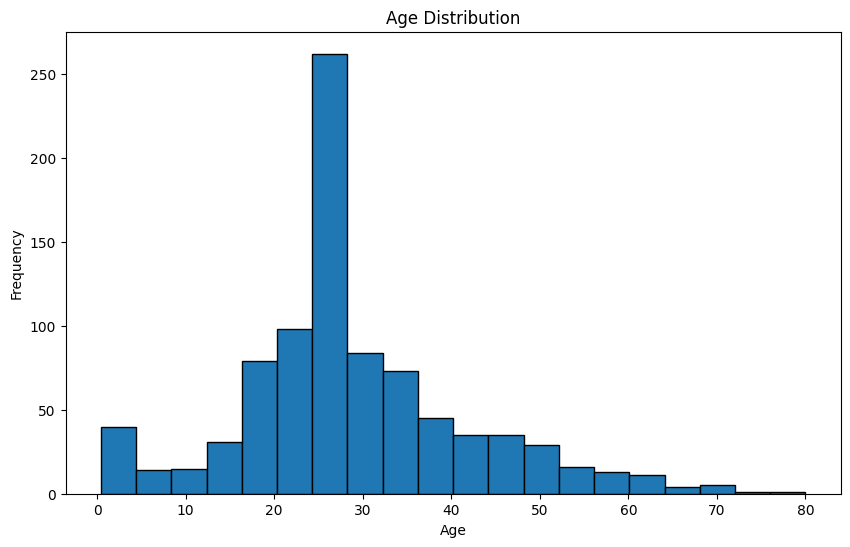

In [28]:
# Visualize the age distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(titanic_df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


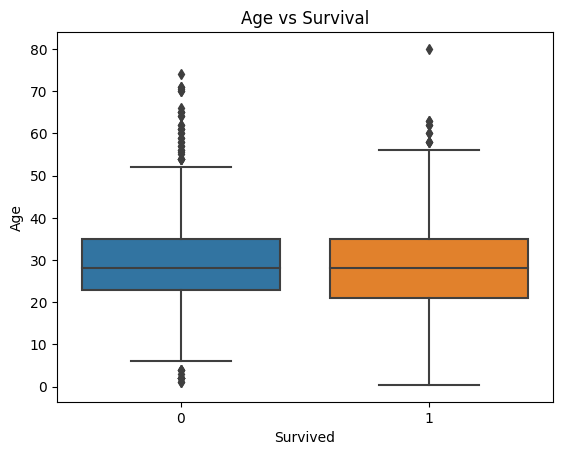

In [20]:
# Explore the relationship between age and survival
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age vs Survival')
plt.show()

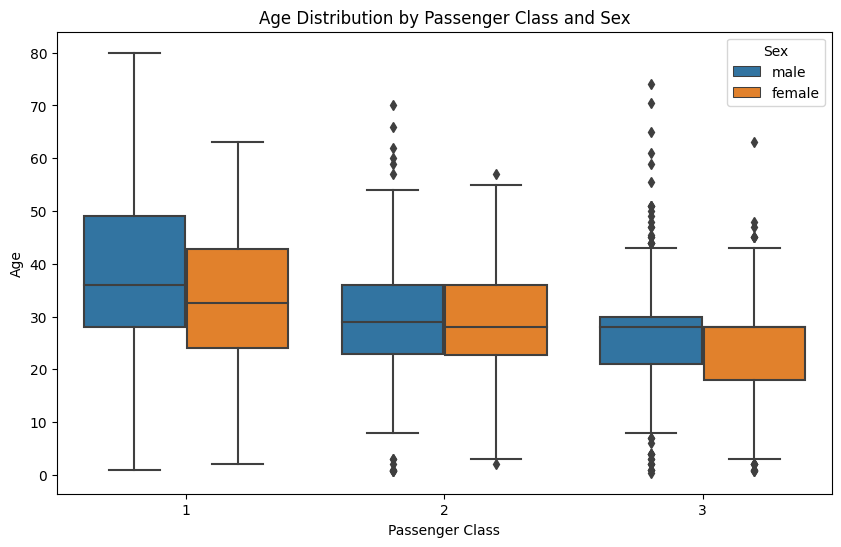

In [29]:
# Age distribution by passenger class and sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.title('Age Distribution by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


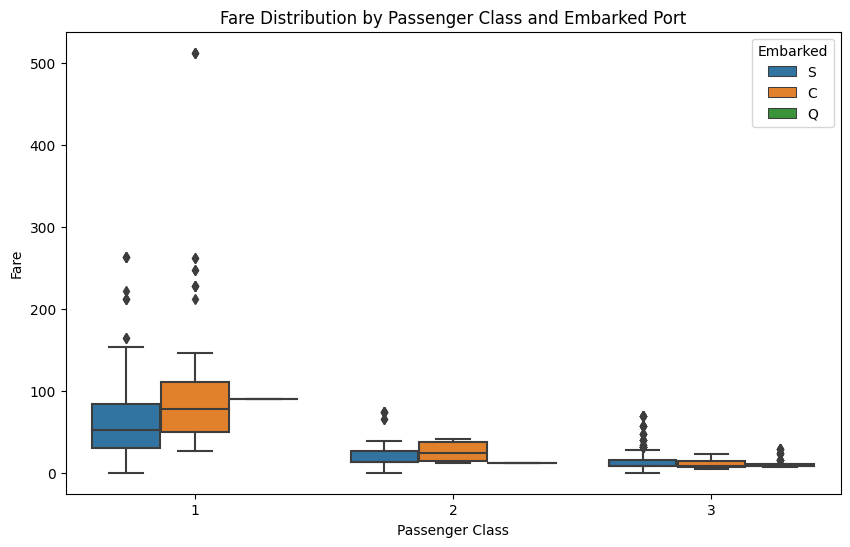

In [30]:
# Fare distribution by passenger class and embarked port
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Embarked', data=titanic_df)
plt.title('Fare Distribution by Passenger Class and Embarked Port')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


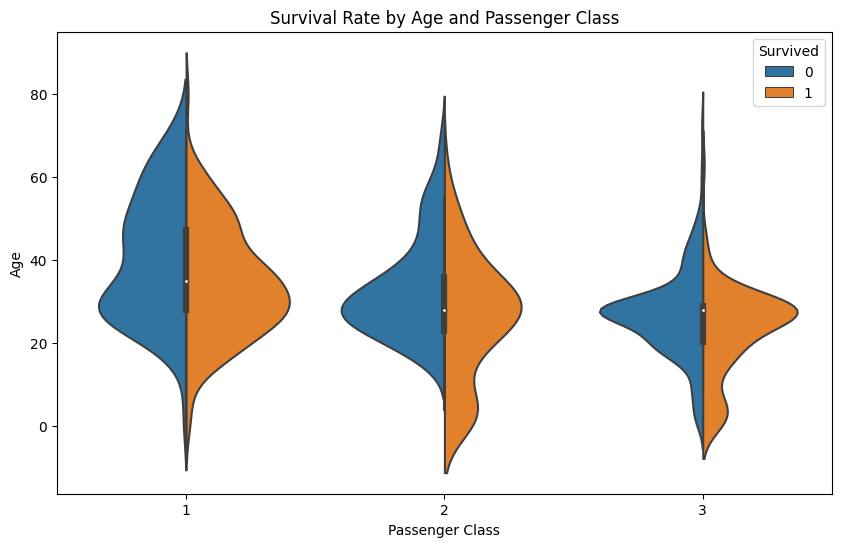

In [31]:
# Survival rate by age and passenger class
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True)
plt.title('Survival Rate by Age and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


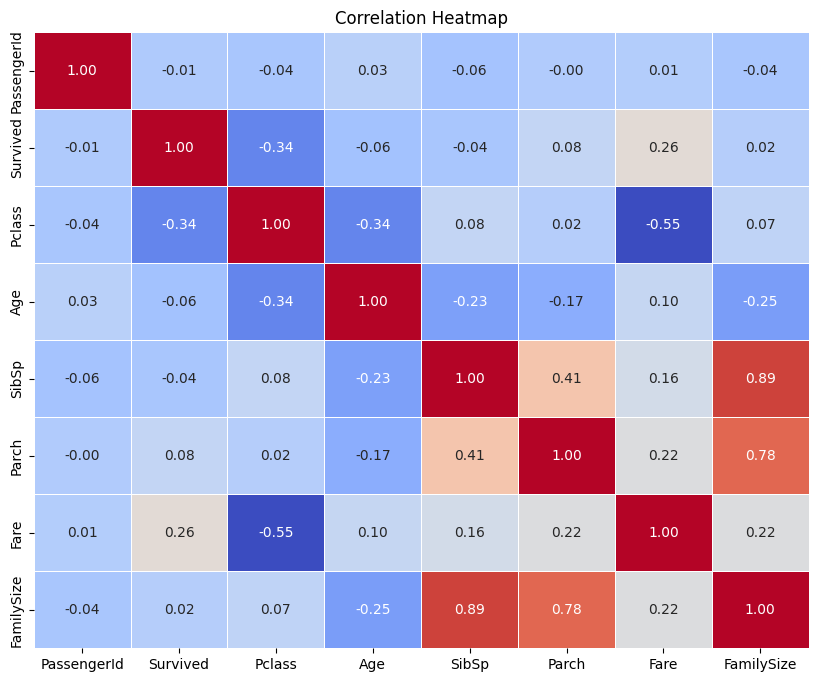

In [35]:
# Exclude non-numeric columns
numeric_columns = titanic_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()


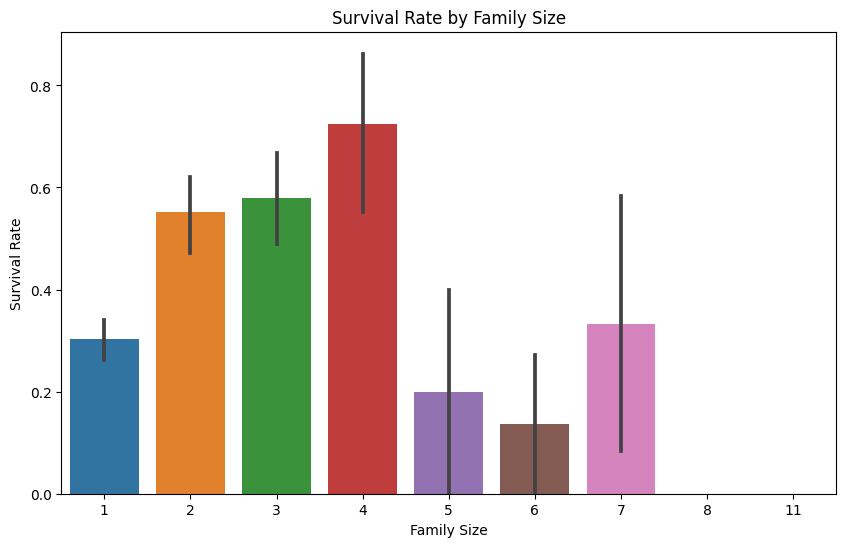

In [33]:
# Create a new feature representing family size
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Survival rate by family size
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic_df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()
